# Regressão 01 - tarefa 01

In [32]:
import pandas as pd
import seaborn as sns 
from seaborn import load_dataset

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import r2_score

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [35]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = (tips['tip']/ (tips['total_bill']))* 100
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,20.98


(0.0, 10.5)

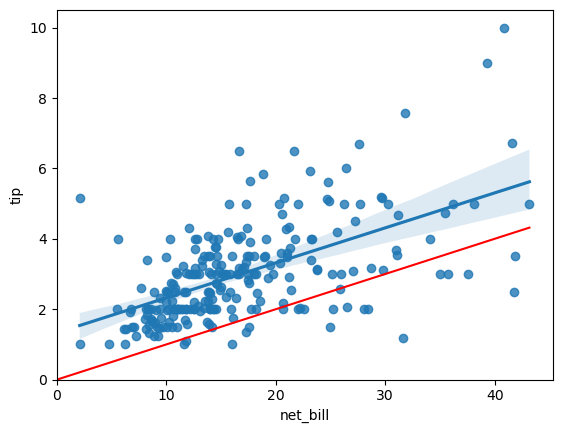

In [37]:
reg_1 = sns.regplot(x = 'net_bill', y= 'tip', data= tips)

x = np.linspace(0, tips['net_bill']. max(), 100)
y = .1*x

plt.plot(x, y, '-r', label= 'linha dos 10%')
plt.xlim(left= 0)
plt.ylim(bottom= 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

<Axes: xlabel='net_bill', ylabel='tip_pct'>

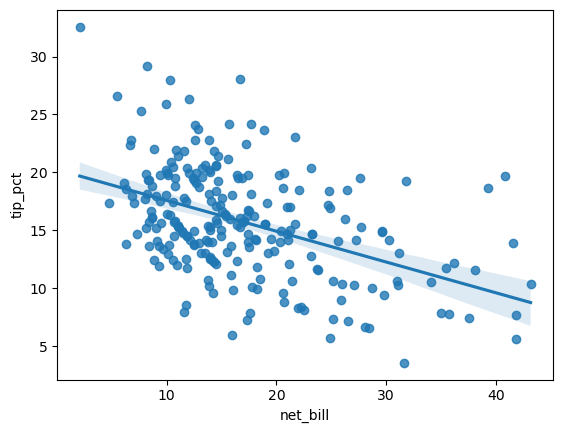

In [40]:
reg_2= sns.regplot(y= 'tip_pct', x= 'net_bill', data= tips[tips['tip_pct']<40])
reg_2

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [51]:
reg1 = smf.ols('tip ~ net_bill', data= tips).fit() 
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           5.02e-23
Time:                        06:55:19   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
reg2= smf.ols('tip_pct ~ net_bill', data= tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.21e-12
Time:                        06:57:40   Log-Likelihood:                -761.73
No. Observations:                 244   AIC:                             1527.
Df Residuals:                     242   BIC:                             1534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6233      0.819     26.401      0.000      20.010      23.237
net_bill      -0.3302      0.044     -7.500      0.000      -0.417      -0.243
==============================================================================
Omnibus:                      227.090   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8183.493
Skew:                           3.464   Prob(JB):                         0.00
Kurtosis:                      30.512   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos verificar que quanto maior o valor da conta, maior a gorjeta, ao mesmo tempo, quanto maior o valor da conta, menor a porcentagem de gorgeta.

O r2 apresenta uma correlaçao possitiva no primeiro grafico, enquanto no segundo grafico apresenta uma correlaçao inversa.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [58]:
pred_tip_pct= reg2.fittedvalues
pred_tip_pct

0      16.346938
1      18.757296
2      15.841753
3      14.897421
4      14.696007
         ...    
239    13.992711
240    13.309225
241    14.798365
242    16.317221
243    16.412975
Length: 244, dtype: float64

In [62]:
pred_tip= pred_tip_pct * tips['net_bill'] 
pred_tip

0      261.224063
1      162.813331
2      277.389092
3      303.460457
4      308.322228
          ...    
239    323.371543
240    335.126296
241    305.882199
242    262.217739
243    258.996742
Length: 244, dtype: float64

In [68]:
r2_score(tips['tip'], pred_tip)

-33952.32773845623

In [78]:
r2 = r2_score(tips['tip'], pred_tip)

print('R2 do valor pred para tip_pct:', round(r2 * 100,2), '%')

print('R2 do modelo `reg2`:', round(reg2.rsquared * 100,2), '%')

R2 do valor pred para tip_pct: -3395232.77 %
R2 do modelo `reg2`: 18.86 %
